
COGS 108 - Individual Final Project

### Overview

The project explored the given datasets ('inspections.csv' and 'zipcodes.csv') to find a relationship between per capita income levels, days from opening date, and nonwhite percentage and health inspection violation count/score. Using histograms, scatter plots, and polyfits, we achieved several results: days from opening date was the biggest indicator of the three, income levels have a partial relationship with heatlh inspection performance, and a nonwhite percentage relationship was nonconclusive.

### Name & ID

Name: Sean Angelo Delos Santos

PID: A13887142

### Research Question

Does there exist a relationship between the frequency of restaurant violations and income levels in North Carolina?

### Background & Prior Work

Information regarding restaurant health inspections and city income levels provided by the IRS are widely available for many states across the US. Examples of IRS Individual Income Tax Statistics and Restaurant Health Inspection data can be found in the references.

Food safety is vitally important in the operation of restaurants and knowledge thereof would therefore prove valuable to many food scientists around the world. By studying the several factors which correlate with improved food safety, we can tune restaurant policies and/or inspection frequency to improve state-wide restaurant health.

The study of food safety and its relationship with socioeconomic factors isn't new as a similar study was conducted in Pennsylvania (linked in Reference #3) which concluded that a stratified approach to delivering food inspections would certainly have an effect on passing inspection scores. More specifically, restaurants which were part of a chain were particularly less likely to encounter food safety violations during inspection.

### References (include links):

- 1)IRS Individual Income Tax Statistics by ZIP Code for 2017: https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2017-zip-code-data-soi
- 2)LA County Health Inspection Statistics: https://data.lacounty.gov/Health/LOS-ANGELES-COUNTY-RESTAURANT-AND-MARKET-INSPECTIO/6ni6-h5kp/data
- 3)Philadelphia, Pennsylvania Food Safety and Socioeconomic Factors Study: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/

### Hypothesis

I hypothesize that the relative income levels and days from opening date will certainly be indicators for frequency of health inspection violations and can be used to tune effectiveness of future health inspections.

I believe it is logical to conclude that lower income neighborhoods may have less resources to uphold food safety standards even though these standards are constant across income levels. Days from opening date could indicate better preparedness as a result of restaurant ownership experience.

### Dataset

The ideal dataset for this project would have geographical data about health inspections (most easily using ZIP Codes) and be able to provide time ranges for the collection process. In addition, having a dataset providing relative income levels within the same geographical and temporal arrangements would be ideal. Of course, we will need a count of citations written by inspectors within a given geographical location.

The dataset must be relatively large to be able to represent individual ZIP Codes fairly (e.g. less than 5 restaurants in a ZIP Code would not be representative) and to accomodate large ranges of income.

### Ethics & Privacy

The project will use public datasets made available by recognized institutions. Some which come to mind are the US Census's and IRS's data on relative income levels by ZIP code and LACounty's health inspection records by restaurant.

No datasets will require extra permission but may encounter biases. For example, tax return information may not be accurate as a marker of average income because many people don't pay taxes for several reasons (e.g. unemployment, very low income, etc). We must be mindful of these assumptions when analyzing our results.

Because much of the data is based off of survey data (e.g. US Census), the data may also be affected by outliers (people who don't take the survey seriously, people who feel strongly about the survey, etc).

For the purposes of this project, we will be using the datasets provided by the COGS 108 course administrators. As they do not contain identifying information on individuals, we will not need to drop any information columns.

### Setup

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning

For our analysis, we will need information from the provided 'inspections.csv' and 'zipcodes.csv' files. They contain the inspection violation count, inspection score, zip code, and income information that we need. Data corresponds to 2012 North Carolina statistics.

In [366]:
inspections_data = pd.read_csv('inspections.csv')
zipcodes_data = pd.read_csv('zipcodes.csv')

We will first need to merge the two CSV files by ZIP code to be able to associate income levels and inspection information. In addition, we will drop rows which contain missing values or have no associated ZIP codes.

In [367]:
df = pd.merge(inspections_data,zipcodes_data, on='zip')
df.dropna()

print(df.head(5))

       hsisid                  date                        name  \
0  4092013748  2012-09-21T00:00:00Z       Cafe 3000 At Wake Med   
1  4092014046  2012-09-21T00:00:00Z         Overtime Sports Pub   
2  4092015191  2012-09-21T00:00:00Z              TASTE OF CHINA   
3  4092015983  2012-09-27T00:00:00Z                    Cariokos   
4  4092300155  2012-10-04T00:00:00Z  Food Lion #586 Meat Market   

               address1 address2     city state  postalcode     phonenumber  \
0     3000 New Bern Ave      NaN  raleigh    NC       27610  (919) 350-8047   
1  1030-149 N Rogers Ln      NaN  raleigh    NC       27610  (919) 255-9556   
2   6209 ROCK QUARRY RD  STE 126  raleigh    NC       27610  (919) 773-2285   
3    1601 CROSS LINK RD   STE 43  raleigh    NC       27610  (919) 755-5727   
4         3416 POOLE RD      NaN  raleigh    NC  27610-2918             NaN   

     restaurantopendate  ...     top_match  second_match  critical  \
0  2002-12-21T00:00:00Z  ...           NaN          

We'd like to check for any confounding variables during our analysis to ensure that our conclusions are as close to accurate as possible. One possible confounding variable in this dataset could be time of the year. Restaurants may perform differently both in revenue and in health inspection performance throughout the year and so we will have to do some preliminary analysis to see if time truly has an effect in this dataset.

The below function parses through the dates in the dataset and returns the month of the inspection.

In [368]:
def get_month(date_string):
    start_index = date_string.find('-')
    end_index = date_string.find('-',start_index+1,len(date_string))
    return int(date_string[start_index+1:end_index])

df['month'] = df['date'].apply(get_month)

print(df['month'].head(5))

0     9
1     9
2     9
3     9
4    10
Name: month, dtype: int64


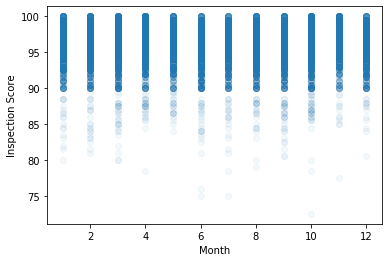

In [369]:
fig8 = plt.figure()
plt.scatter(df['month'],df['score'],alpha=0.05)
plt.xlabel('Month')
plt.ylabel('Inspection Score')

fig8.show()

As we can see from the graph above, inspection scores seem to be uniform throughout the year, suggesting no significant relationship exists between time of the year and inspection score.

## Data Analysis

### Per Capita Income vs. Inspection Performance

Next, we want to look at the relationship between per capita income and inspection performance. We plot per capita income against the number of critical violations, number of non-critical violations, and overall inspection score.

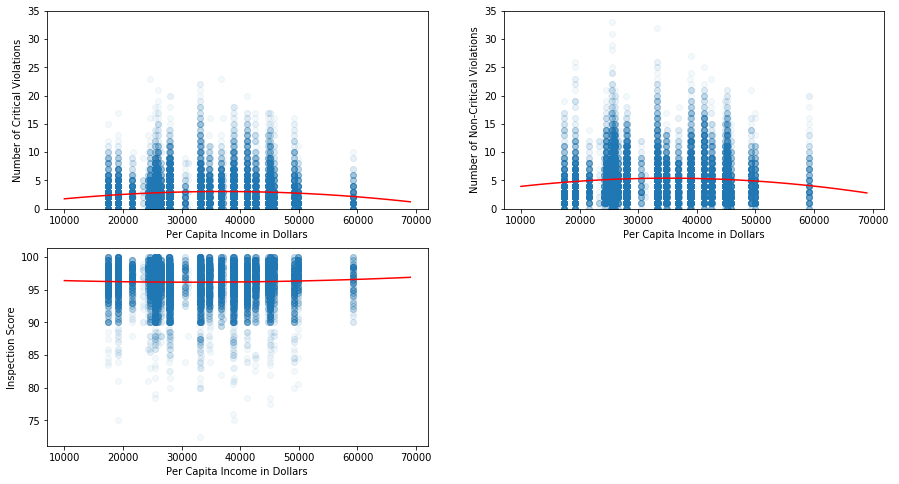

In [370]:
fig2 = plt.figure(figsize=(15,8))

ax = fig2.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig2.add_subplot(221)
plt.scatter(df['per_capita_income_dollars'],df['num_critical'],alpha=0.05)
plt.xlabel('Per Capita Income in Dollars')
ax1.set_ylabel('Number of Critical Violations')
ax1.set_ylim(0,35)

a1, b1, c1 = np.polyfit(df['per_capita_income_dollars'],df['num_critical'],2)
pred = a1 * np.arange(10000,70000,1000)**2 + b1 * np.arange(10000,70000,1000) + c1

plt.plot(np.arange(10000,70000,1000),pred,'r')

ax2 = fig2.add_subplot(222)
plt.scatter(df['per_capita_income_dollars'],df['num_non_critical'],alpha=0.05)
plt.xlabel('Per Capita Income in Dollars')
ax2.set_ylabel('Number of Non-Critical Violations')
ax2.set_ylim(0,35)

a2, b2, c2 = np.polyfit(df['per_capita_income_dollars'],df['num_non_critical'],2)
pred = a2 * np.arange(10000,70000,1000)**2 + b2 * np.arange(10000,70000,1000) + c2

plt.plot(np.arange(10000,70000,1000),pred,'r')

ax3 = fig2.add_subplot(223)
plt.scatter(df['per_capita_income_dollars'],df['score'],alpha=0.05)
plt.xlabel('Per Capita Income in Dollars')
plt.ylabel('Inspection Score')

a2, b2, c2 = np.polyfit(df['per_capita_income_dollars'],df['score'],2)
pred = a2 * np.arange(10000,70000,1000)**2 + b2 * np.arange(10000,70000,1000) + c2

plt.plot(np.arange(10000,70000,1000),pred,'r')

fig2.show()

Due to violations being generally undesirable, it is understandable that scores would be more concentrated towards the lower violation counts. This is especially true for non-critical violation counts as these are more abundant. A 2-degree polyfit has been added to the graphs to illustrate that although the data seems to suggest a sharply modal distribution, much of what we are seeing are outliers and the bulk of the datapoints are within less than 5 violations or within a score of 95 and greater.

Below, we have performed the same analysis but this time only calculated polyfit using violation counts above 7 and scores below 93. This was in an attempt to mitigate the effects of the concentrated low scores.

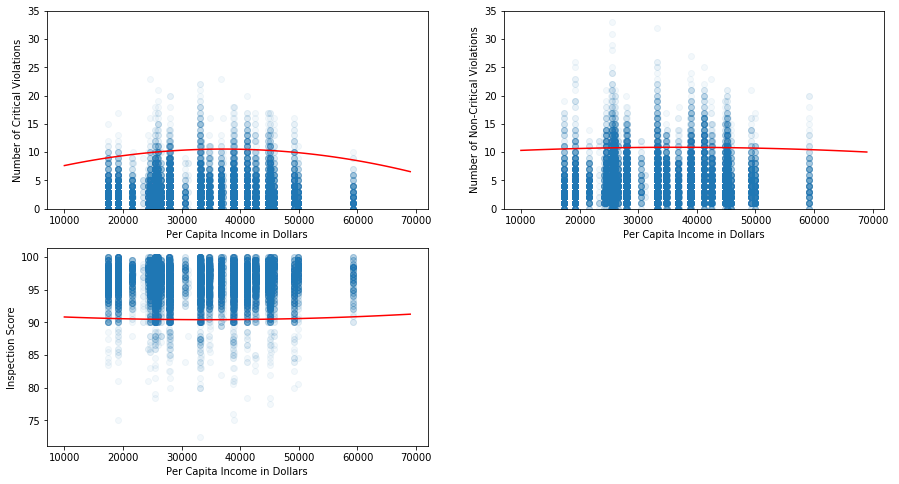

In [371]:
fig2 = plt.figure(figsize=(15,8))

ax = fig2.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig2.add_subplot(221)
plt.scatter(df['per_capita_income_dollars'],df['num_critical'],alpha=0.05)
plt.xlabel('Per Capita Income in Dollars')
ax1.set_ylabel('Number of Critical Violations')
ax1.set_ylim(0,35)

a1, b1, c1 = np.polyfit(df['per_capita_income_dollars'].loc[df['num_critical']>7],df['num_critical'].loc[df['num_critical']>7],2)
pred = a1 * np.arange(10000,70000,1000)**2 + b1 * np.arange(10000,70000,1000) + c1

plt.plot(np.arange(10000,70000,1000),pred,'r')

ax2 = fig2.add_subplot(222)
plt.scatter(df['per_capita_income_dollars'],df['num_non_critical'],alpha=0.05)
plt.xlabel('Per Capita Income in Dollars')
ax2.set_ylabel('Number of Non-Critical Violations')
ax2.set_ylim(0,35)

a2, b2, c2 = np.polyfit(df['per_capita_income_dollars'].loc[df['num_non_critical']>7],df['num_non_critical'].loc[df['num_non_critical']>7],2)
pred = a2 * np.arange(10000,70000,1000)**2 + b2 * np.arange(10000,70000,1000) + c2

plt.plot(np.arange(10000,70000,1000),pred,'r')

ax3 = fig2.add_subplot(223)
plt.scatter(df['per_capita_income_dollars'],df['score'],alpha=0.05)
plt.xlabel('Per Capita Income in Dollars')
plt.ylabel('Inspection Score')

a2, b2, c2 = np.polyfit(df['per_capita_income_dollars'].loc[df['score']<93],df['score'].loc[df['score']<93],2)
pred = a2 * np.arange(10000,70000,1000)**2 + b2 * np.arange(10000,70000,1000) + c2

plt.plot(np.arange(10000,70000,1000),pred,'r')

fig2.show()

As we can see, the polyfit on critical violation counts seems to have gotten sharper compared to the polyfits on the non-critical violations and scores, suggesting that per capita income is a better indicator of critical violations than of non-critical violations or overall scores. This relationship, however, seems weak as shown by the shallow shape of the critical violation polyfit and will require more investigation. Likely this may have occurred due to the overall lower number of critical violations in the dataset.

### Days from Opening Date vs. Inspection Performance

Next, we will try to look at days from opening date as a possible indicator of violation counts and overall scores.

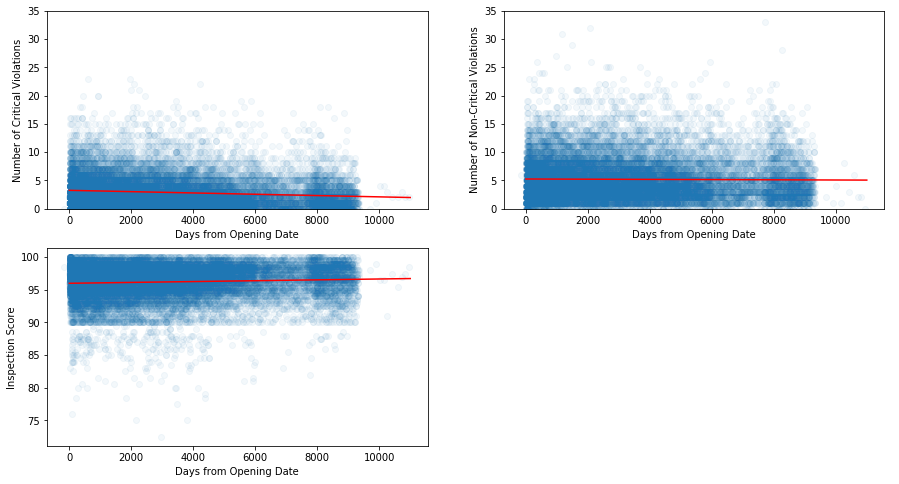

In [372]:
fig4 = plt.figure(figsize=(15,8))

ax = fig4.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig4.add_subplot(221)
plt.scatter(df['days_from_open_date'],df['num_critical'],alpha=0.05)
plt.xlabel('Days from Opening Date')
ax1.set_ylabel('Number of Critical Violations')
ax1.set_ylim(0,35)

a1, b1 = np.polyfit(df['days_from_open_date'],df['num_critical'],1)
pred = a1 * np.arange(0,12000,1000) + b1

plt.plot(np.arange(0,12000,1000),pred,'r')

ax2 = fig4.add_subplot(222)
plt.scatter(df['days_from_open_date'],df['num_non_critical'],alpha=0.05)
plt.xlabel('Days from Opening Date')
ax2.set_ylabel('Number of Non-Critical Violations')
ax2.set_ylim(0,35)

a2, b2 = np.polyfit(df['days_from_open_date'],df['num_non_critical'],1)
pred = a2 * np.arange(0,12000,1000) + b2

plt.plot(np.arange(0,12000,1000),pred,'r')

ax3 = fig4.add_subplot(223)
plt.scatter(df['days_from_open_date'],df['score'],alpha=0.05)

a1, b1 = np.polyfit(df['days_from_open_date'],df['score'],1)
pred = a1 * np.arange(0,12000,1000) + b1

plt.plot(np.arange(0,12000,1000),pred,'r')

plt.xlabel('Days from Opening Date')
plt.ylabel('Inspection Score')

fig4.show()

As we can see from the graphs, there is a more visible linear, downward trend in both critical violations and non-critical violations as well as a linear, upward trend in inspection scores when accounting for days from opening date.

Also notable is the apparent, disproportionate lack of restaurants having opened within 6000-8000 days of the inspection date. It is always nice to find hidden properties of the dataset when running analysis.

We run the same procedure as before, applying polyfit to violation counts above 7 and scores below 93.

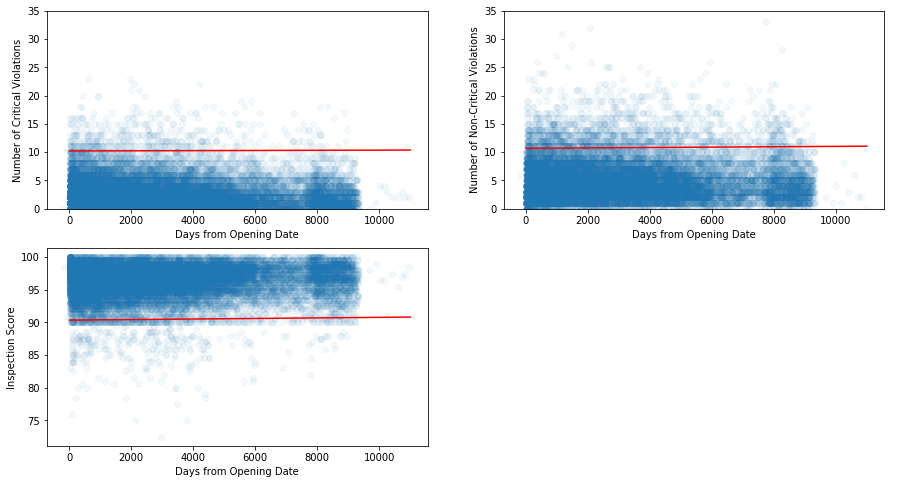

In [373]:
fig4 = plt.figure(figsize=(15,8))

ax = fig4.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig4.add_subplot(221)
plt.scatter(df['days_from_open_date'],df['num_critical'],alpha=0.05)
plt.xlabel('Days from Opening Date')
ax1.set_ylabel('Number of Critical Violations')
ax1.set_ylim(0,35)

a1, b1 = np.polyfit(df['days_from_open_date'].loc[df['num_critical']>7],df['num_critical'].loc[df['num_critical']>7],1)
pred = a1 * np.arange(0,12000,1000) + b1

plt.plot(np.arange(0,12000,1000),pred,'r')

ax2 = fig4.add_subplot(222)
plt.scatter(df['days_from_open_date'],df['num_non_critical'],alpha=0.05)
plt.xlabel('Days from Opening Date')
ax2.set_ylabel('Number of Non-Critical Violations')
ax2.set_ylim(0,35)

a2, b2 = np.polyfit(df['days_from_open_date'].loc[df['num_non_critical']>7],df['num_non_critical'].loc[df['num_non_critical']>7],1)
pred = a2 * np.arange(0,12000,1000) + b2

plt.plot(np.arange(0,12000,1000),pred,'r')

ax3 = fig4.add_subplot(223)
plt.scatter(df['days_from_open_date'],df['score'],alpha=0.05)

a1, b1 = np.polyfit(df['days_from_open_date'].loc[df['score']<93],df['score'].loc[df['score']<93],1)
pred = a1 * np.arange(0,12000,1000) + b1

plt.plot(np.arange(0,12000,1000),pred,'r')

plt.xlabel('Days from Opening Date')
plt.ylabel('Inspection Score')

fig4.show()

We do not see any apparent changes in polyfit slope.

### Nonwhite Resident Percentage vs. Inspection Performance

Lastly, we look at percentage of nonwhite residents and its relationship with health inspection performance.

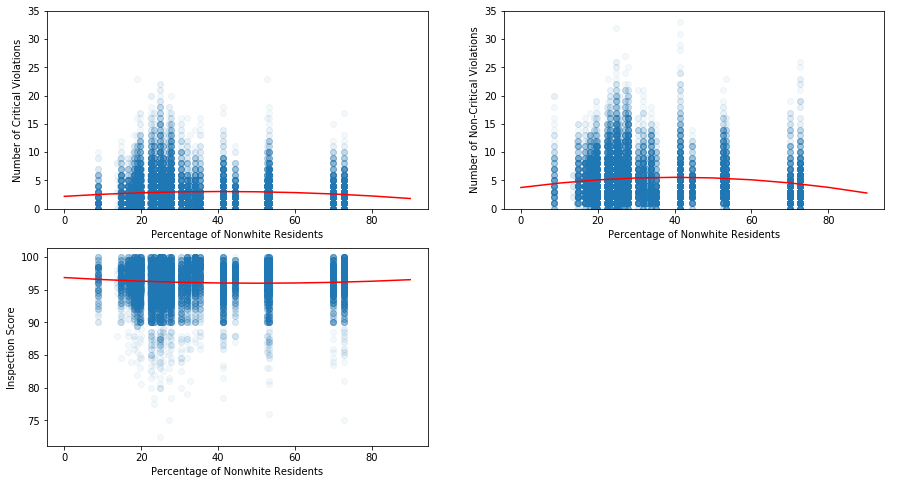

In [374]:
fig6 = plt.figure(figsize=(15,8))

ax = fig6.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig6.add_subplot(221)
plt.scatter(df['percent_nonwhite'],df['num_critical'],alpha=0.05)
plt.xlabel('Percentage of Nonwhite Residents')
ax1.set_ylabel('Number of Critical Violations')
ax1.set_ylim(0,35)

a1, b1, c1 = np.polyfit(df['percent_nonwhite'],df['num_critical'],2)
pred = a1 * np.arange(0,100,10)**2 + b1 * np.arange(0,100,10) + c1

plt.plot(np.arange(0,100,10),pred,'r')

ax2 = fig6.add_subplot(222)
plt.scatter(df['percent_nonwhite'],df['num_non_critical'],alpha=0.05)
plt.xlabel('Percentage of Nonwhite Residents')
ax2.set_ylabel('Number of Non-Critical Violations')
ax2.set_ylim(0,35)

a2, b2, c2 = np.polyfit(df['percent_nonwhite'],df['num_non_critical'],2)
pred = a2 * np.arange(0,100,10)**2 + b2 * np.arange(0,100,10) + c2

plt.plot(np.arange(0,100,10),pred,'r')

ax3 = fig6.add_subplot(223)
plt.scatter(df['percent_nonwhite'],df['score'],alpha=0.05)
plt.xlabel('Percentage of Nonwhite Residents')
plt.ylabel('Inspection Score')

a1, b1, c1 = np.polyfit(df['percent_nonwhite'],df['score'],2)
pred = a1 * np.arange(0,100,10)**2 + b1 * np.arange(0,100,10) + c1

plt.plot(np.arange(0,100,10),pred,'r')

fig6.show()

Plotting percentage of nonwhite residents against violation count and overall score, we see a strong modal distribution at about 20% nonwhite percentage. However, this is not reflected in the polyfit which maintains a relatively central peak, indicating that perhaps a large portion of datapoints are strongly concentrated in the 50%-80% nonwhite range. Decreasing the transparency of the individual points by 10x demonstrates this possibility.

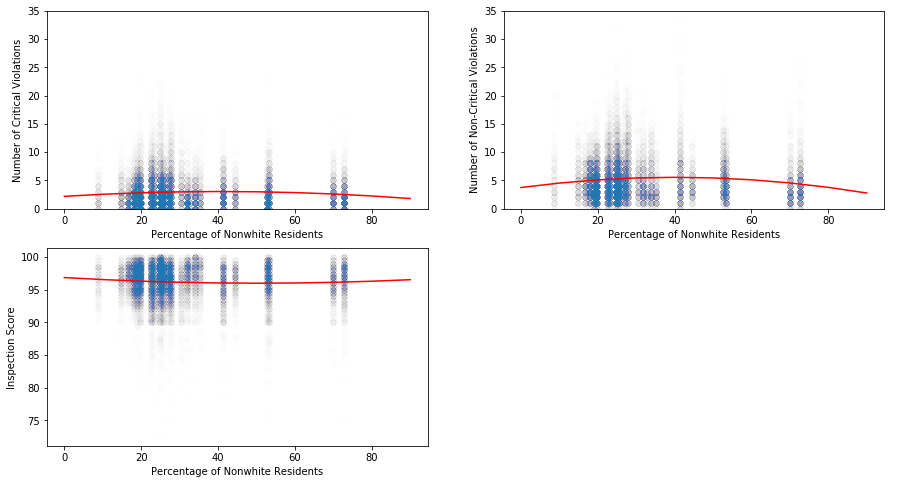

In [375]:
fig6 = plt.figure(figsize=(15,8))

ax = fig6.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig6.add_subplot(221)
plt.scatter(df['percent_nonwhite'],df['num_critical'],alpha=0.005)
plt.xlabel('Percentage of Nonwhite Residents')
ax1.set_ylabel('Number of Critical Violations')
ax1.set_ylim(0,35)

a1, b1, c1 = np.polyfit(df['percent_nonwhite'],df['num_critical'],2)
pred = a1 * np.arange(0,100,10)**2 + b1 * np.arange(0,100,10) + c1

plt.plot(np.arange(0,100,10),pred,'r')

ax2 = fig6.add_subplot(222)
plt.scatter(df['percent_nonwhite'],df['num_non_critical'],alpha=0.005)
plt.xlabel('Percentage of Nonwhite Residents')
ax2.set_ylabel('Number of Non-Critical Violations')
ax2.set_ylim(0,35)

a2, b2, c2 = np.polyfit(df['percent_nonwhite'],df['num_non_critical'],2)
pred = a2 * np.arange(0,100,10)**2 + b2 * np.arange(0,100,10) + c2

plt.plot(np.arange(0,100,10),pred,'r')

ax3 = fig6.add_subplot(223)
plt.scatter(df['percent_nonwhite'],df['score'],alpha=0.005)
plt.xlabel('Percentage of Nonwhite Residents')
plt.ylabel('Inspection Score')

a1, b1, c1 = np.polyfit(df['percent_nonwhite'],df['score'],2)
pred = a1 * np.arange(0,100,10)**2 + b1 * np.arange(0,100,10) + c1

plt.plot(np.arange(0,100,10),pred,'r')

fig6.show()

The concentrations in the upper percentage range are on-par with the concentrations in the lower percentage range in the critical violations counts but lower in the non-critical violations counts, evident by the slight shift of the polyfit peak towards the lower percentage range in the non-critical violations graph.

As with the previous investigations, we will polyfit using counts greater than 7 or scores lower than 93. 

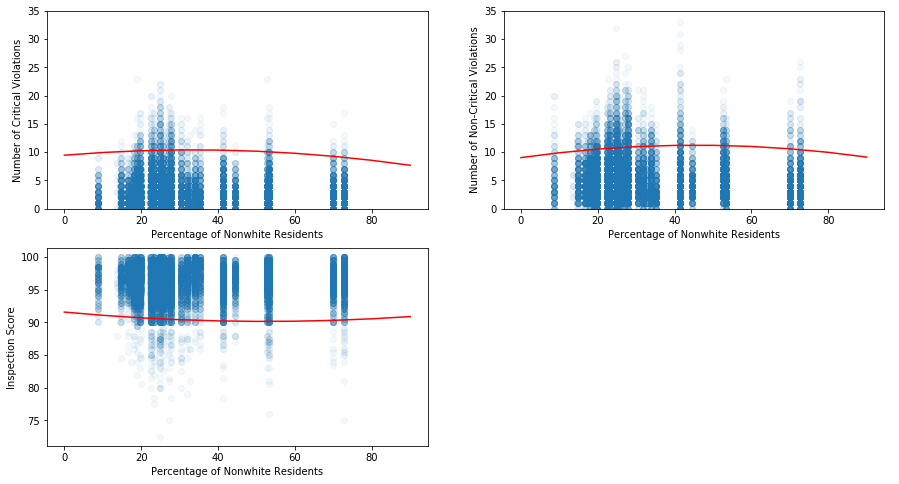

In [376]:
fig6 = plt.figure(figsize=(15,8))

ax = fig6.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig6.add_subplot(221)
plt.scatter(df['percent_nonwhite'],df['num_critical'],alpha=0.05)
plt.xlabel('Percentage of Nonwhite Residents')
ax1.set_ylabel('Number of Critical Violations')
ax1.set_ylim(0,35)

a1, b1, c1 = np.polyfit(df['percent_nonwhite'].loc[df['num_critical']>7],df['num_critical'].loc[df['num_critical']>7],2)
pred = a1 * np.arange(0,100,10)**2 + b1 * np.arange(0,100,10) + c1


plt.plot(np.arange(0,100,10),pred,'r')

ax2 = fig6.add_subplot(222)
plt.scatter(df['percent_nonwhite'],df['num_non_critical'],alpha=0.05)
plt.xlabel('Percentage of Nonwhite Residents')
ax2.set_ylabel('Number of Non-Critical Violations')
ax2.set_ylim(0,35)

a2, b2, c2 = np.polyfit(df['percent_nonwhite'].loc[df['num_non_critical']>7],df['num_non_critical'].loc[df['num_non_critical']>7],2)
pred = a2 * np.arange(0,100,10)**2 + b2 * np.arange(0,100,10) + c2

plt.plot(np.arange(0,100,10),pred,'r')

ax3 = fig6.add_subplot(223)
plt.scatter(df['percent_nonwhite'],df['score'],alpha=0.05)
plt.xlabel('Percentage of Nonwhite Residents')
plt.ylabel('Inspection Score')

a1, b1, c1 = np.polyfit(df['percent_nonwhite'].loc[df['score']<93],df['score'].loc[df['score']<93],2)
pred = a1 * np.arange(0,100,10)**2 + b1 * np.arange(0,100,10) + c1

plt.plot(np.arange(0,100,10),pred,'r')

fig6.show()

We do not see any noticeable changes.

### Results

Our investigation of per capita income, days since opening date, and nonwhite resident percentage allowed us to find few conclusions:

* Per capita income may serve as a better indicator for critical health inspection violations than for non-critical health inspection violations. Critical violations seem to occur most often around the $40000 per capita income mark.

* Time of the year has no evident relationship with health inspection performance.

* Days since opening date shows an inverse relationship with critical and non-critical health violation counts, and a positive relationship with overall health inspection score.

* Additional investigation will be needed to conclude that there is a significance between nonwhite percentage in the 20%-40% range and inspection performance or if the graph only shows this due to a non-uniform distribution of nonwhite resident percentages.

### Conclusions & Discussion

The results seem to partially support my hypotheses in that per capita income only seems to have a relationship with critical violations. Days since opening date, however, certainly shows a significant relationship with health inspection performance, perhaps due to increased knowledge and awareness over time of proper restaurant health. More advanced techniques and further investigation can certainly find more relationships within the dataset, which itself can be improved through more uniform, thorough collection techniques. During analysis, we found several nonuniformities in the data, which disallow us from making some conclusions about the data.